# SPECIO

In [7]:
%matplotlib notebook
#%matplotlib inline

#import mpld3
#mpld3.enable_notebook()
from IPython.display import HTML, display, clear_output
import ipywidgets as widgets
import specio
import os
from glob import glob

In [8]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle code <a href="javascript:code_toggle()">on/off</a>.''')

Callisto Sp0544-2433 I+z SP000000 all 



<IPython.core.display.Javascript object>


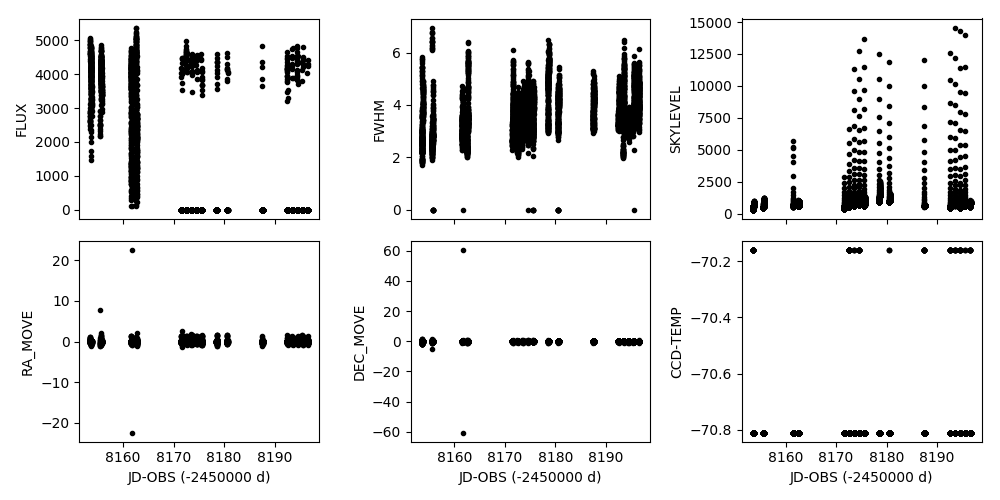

#NUM_NIGHTS_TOTAL 	 NUM_IMAGES_TOTAL
17 	 4891

#DATE 	 NUM_IMAGES
2018-02-03 	 348
2018-02-05 	 322
2018-02-11 	 332
2018-02-12 	 329
2018-02-21 	 305
2018-02-22 	 307
2018-02-23 	 308
2018-02-24 	 306
2018-02-25 	 303
2018-02-28 	 289
2018-03-02 	 281
2018-03-09 	 262
2018-03-14 	 246
2018-03-15 	 246
2018-03-16 	 246
2018-03-17 	 241
2018-03-18 	 220


In [11]:
#::: telescope drowndown widget
telescope_w = widgets.Dropdown(
    options=['Io','Europa','Callisto','Ganymed'],
    value='Callisto',
    description='Telescope'
)
display(telescope_w)
#telescope = telescope_w.value


#::: read available fields and filters for this telescope
def get_field_and_filter_w_options():
    telescope = telescope_w.value
    try:
        buf = glob( os.path.join(specio.root(telescope), '*') )
        fields_and_filters = [ item.split('/')[-1][0:-11] for item in buf ]
        #field_and_filter_w.options = fields_and_filters
        return fields_and_filters
    except:
        return ['No data available']


#::: fields and filters dropdown widget
field_and_filter_w = widgets.Dropdown(
    options=get_field_and_filter_w_options(),
    description='Fields and filters'
)
display(field_and_filter_w)
field_name, filter_band = field_and_filter_w.value.split('_')


#::: read available obj_ids for this telescope, field and filter
def get_obj_id_w_options():
    telescope = telescope_w.value
    try:
        field_name, filter_band = field_and_filter_w.value.split('_')
        dic = specio.get(telescope, field_name, filter_band, ['OBJ_ID'], silent=True)
        obj_ids = list(dic['OBJ_ID'])
        return obj_ids
    except:
        return ['No data available']
        

#::: OBJ_IDs dropdown widget
obj_id_w = widgets.Dropdown(
    options=get_obj_id_w_options(),
    description='Object ID'
)
display(obj_id_w)
obj_id = obj_id_w.value


#::: read available obj_ids for this telescope, field and filter
def get_date_w_options():
    try:
        telescope = telescope_w.value
        field_name, filter_band = field_and_filter_w.value.split('_')
        obj_id = obj_id_w.value
        dic = specio.get(telescope, field_name, filter_band, ['STATS'], silent=True)
        #print dic
        dates = ['all'] + list(dic['STATS'][0])
        return dates
    except:
        return ['No data available']
        

#::: OBJ_IDs dropdown widget
date_w = widgets.Dropdown(
    options=get_date_w_options(),
    description='Date'
)
display(date_w)
date = date_w.value


#::: selection changes, update dropdown menus
def update_dropdown_menus(b):
    field_and_filter_w.options = get_field_and_filter_w_options()
    obj_id_w.options = get_obj_id_w_options()
    date_w.options = get_date_w_options()
    
    
#::: selection changes, update dropdown menus
telescope_w.observe(update_dropdown_menus)
field_and_filter_w.observe(update_dropdown_menus)
obj_id_w.observe(update_dropdown_menus)



#::: run
def run(b):
    clear_output()
    try:
        telescope = telescope_w.value
        field_name, filter_band = field_and_filter_w.value.split('_')
        obj_id = obj_id_w.value
        date = date_w.value
        print telescope, field_name, filter_band, obj_id, date, '\n'
        if date=='all':
            fig_overview, axes_overview = specio.plot_overview(telescope, field_name, filter_band, obj_id=obj_id)
        else:   
            fig_overview, axes_overview = specio.plot_overview(telescope, field_name, filter_band, obj_id=obj_id, time_date=date)
        specio.print_stats(telescope, field_name, filter_band, sep='\t')
    except:
        print("No data available")
    
#::: run button
button = widgets.Button(description="Query")
display(button)
button.on_click(run)


